In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
#from helpers.plot_helpers import *
import cmocean
import os
import warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl
import cartopy.crs as ccrs

%load_ext autoreload
%autoreload 3

# Default matplotlib plotting parameters

In [2]:
import matplotlib
def default_rcParams(kw={}):
    '''
    Also matplotlib.rcParamsDefault contains the default values,
    but:
    - backend is changed
    - without plotting something as initialization,
    inline does not work
    '''
    plt.plot()
    plt.close()
    rcParams = matplotlib.rcParamsDefault.copy()
    
    # We do not change backend because it can break
    # inlining; Also, 'backend' key is broken and 
    # we cannot use pop method
    for key, val in rcParams.items():
        if key != 'backend':
            rcParams[key] = val

    matplotlib.rcParams.update({
        'font.family': 'MathJax_Main',
        'mathtext.fontset': 'cm',

        'figure.figsize': (4, 4),

        'figure.subplot.wspace': 0.3,
        
        'font.size': 14,
        #'axes.labelsize': 10,
        #'axes.titlesize': 12,
        #'xtick.labelsize': 10,
        #'ytick.labelsize': 10,
        #'legend.fontsize': 10,

        'axes.formatter.limits': (-2,3),
        'axes.formatter.use_mathtext': True,
        'axes.labelpad': 0,
        'axes.titlelocation' : 'center',
        
        'savefig.bbox': 'tight',
        'savefig.pad_inches': 0.1
    })
    matplotlib.rcParams.update(**kw)

# Spatial average of temperature

In [3]:
from dask.diagnostics import ProgressBar
def global_average(file_path):
    thetao = xr.open_mfdataset(file_path).thetao
    static = xr.open_mfdataset('/scratch/pp2681/mom6/OM4_SIS2/unparameterized/output/ocean_geometry.nc').rename({'lath': 'yh', 'lonh':'xh'})

    with ProgressBar():
        return ((thetao * static.dxT * static.dyT).mean(['xh','yh']) / (static.dxT * static.dyT).mean(['xh','yh'])).compute()

In [4]:
om4 = global_average('/scratch/pp2681/mom6/OM4_SIS2/unparameterized/output/*ocean_month_z*')

[########################################] | 100% Completed | 43.84 s


In [20]:
zb20 = global_average('/scratch/pp2681/mom6/OM4_SIS2/ZB20-Reynolds/output/*ocean_month_z*')
ann_redline = global_average('/scratch/pp2681/mom6/OM4_SIS2/ANN-redline/output/*ocean_month_z*')
ann_greenline = global_average('/scratch/pp2681/mom6/OM4_SIS2/ANN-greenline/output/*ocean_month_z*')

[########################################] | 100% Completed | 46.59 s
[########################################] | 100% Completed | 46.75 s
[########################################] | 100% Completed | 50.99 s


In [24]:
#!pip install nc-time-axis
!pip install colormaps

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.9/727.9 kB 6.2 MB/s eta 0:00:0000:01


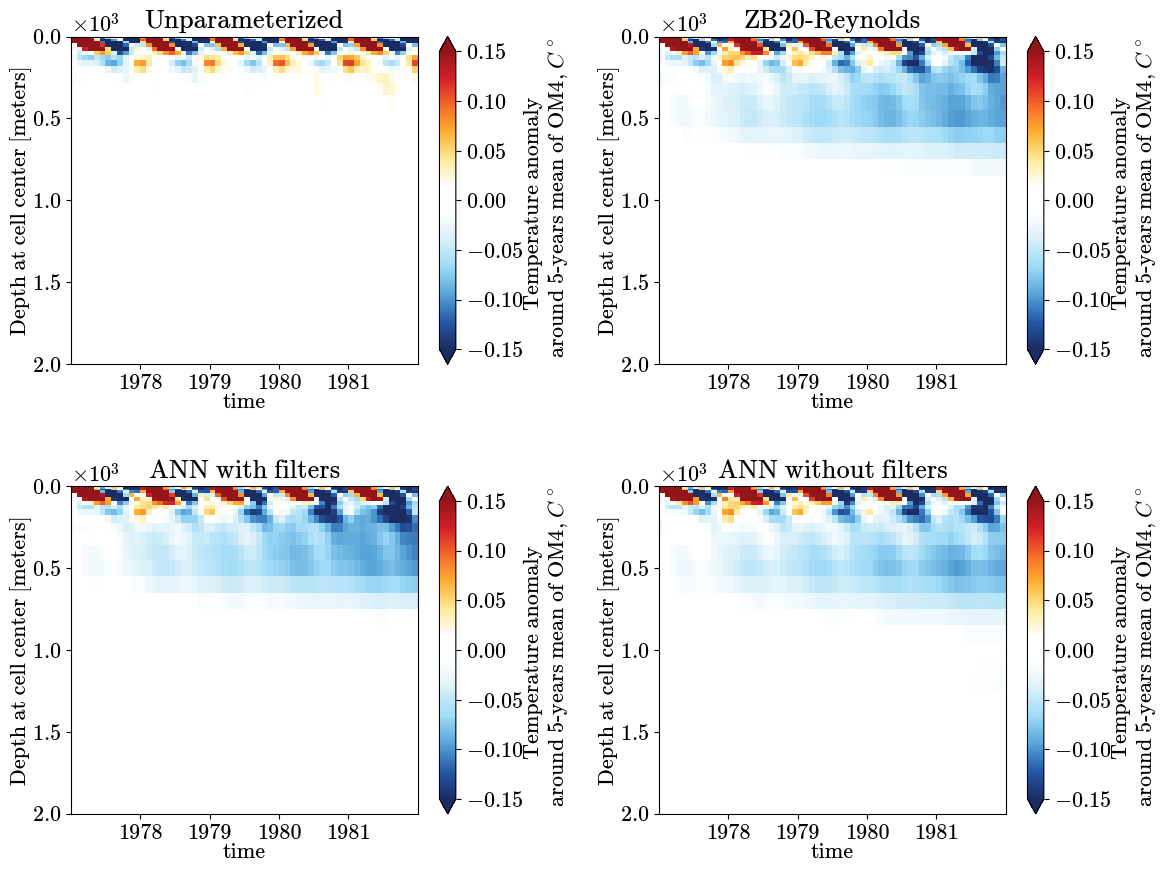

In [48]:
default_rcParams({'font.size': 16})

import colormaps as cmaps
plt.figure(figsize=(12,9))
plt.subplot(2,2,1)
(om4 - om4.mean('time')).plot(x='time', cmap=cmaps.BlueWhiteOrangeRed, vmax=0.15, vmin=-0.15, cbar_kwargs={'label':'Temperature anomaly \n around 5-years mean of OM4, $C^\circ$'})
plt.ylim([2000,0])
plt.title('Unparameterized')

plt.subplot(2,2,2)
(zb20 - om4.mean('time')).plot(x='time', cmap=cmaps.BlueWhiteOrangeRed, vmax=0.15, vmin=-0.15, cbar_kwargs={'label':'Temperature anomaly \n around 5-years mean of OM4, $C^\circ$'})
plt.ylim([2000,0])
plt.title('ZB20-Reynolds')

plt.subplot(2,2,3)
(ann_redline - om4.mean('time')).plot(x='time', cmap=cmaps.BlueWhiteOrangeRed, vmax=0.15, vmin=-0.15, cbar_kwargs={'label':'Temperature anomaly \n around 5-years mean of OM4, $C^\circ$'})
plt.ylim([2000,0])
plt.title('ANN with filters')

plt.subplot(2,2,4)
(ann_greenline - om4.mean('time')).plot(x='time', cmap=cmaps.BlueWhiteOrangeRed, vmax=0.15, vmin=-0.15, cbar_kwargs={'label':'Temperature anomaly \n around 5-years mean of OM4, $C^\circ$'})
plt.ylim([2000,0])
plt.title('ANN without filters')

plt.tight_layout()
plt.savefig('thetao-global.pdf')